In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



In [3]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head(20)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

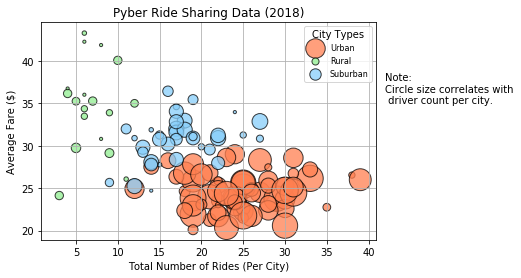

In [12]:
# Obtain the x and y coordinates for each of the three city types
urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])
# Build the scatter plots for each city types
#Urban stats
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

#Rural stats
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

#Suburban stats
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["lightgreen"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with\n driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")


In [5]:
# Show plot
plt.show()

## Total Fares by City Type

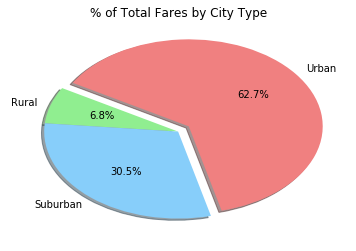

In [6]:
# Calculate Type Percents
type_groupped = pyber_df.groupby(['type'])
fare_sum = type_groupped['fare'].sum()
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["lightgreen", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")


In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

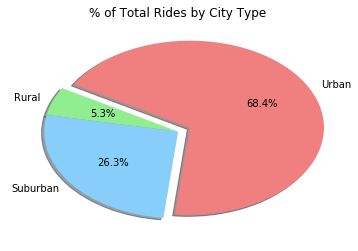

In [8]:
# Calculate Type Percents
rides_count = type_groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["lightgreen", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

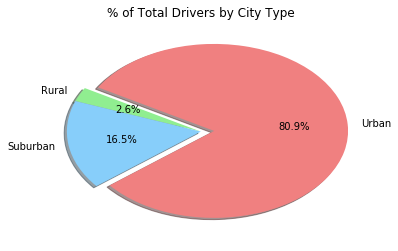

In [10]:
# Calculate Type Percents
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["lightgreen", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/TotalDriversbyCityType.png")

In [11]:
# Show Figure
plt.show()